In [1]:
#importing dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

Data Preperation

In [2]:
#reading csv
file_path = Path("//Users/smith/Desktop/GitHub Repos/unsupervised-learning-challenge/crypto_data.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
#CHECKING DATA TYPES
df.dtypes

Unnamed: 0          object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [4]:
#FILTERING OUT INACTIVE CURRENCIES
True_df = df[df['IsTrading'] == True]
True_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
#CHECKING WORK
True_df['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
#Dropping IsTrading Column
True_df = True_df.drop(columns=["IsTrading"])
True_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
# Dropping all null values
True_df = True_df.dropna()
True_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [9]:
#checking min mined coins value
True_df['TotalCoinsMined'].min()

-5917977547.96773

In [10]:
#Filtering for currencies that have more than 0 mined coins
Mined_df = True_df[True_df['TotalCoinsMined'] > 0]
Mined_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
#Checking work
Mined_df['TotalCoinsMined'].min()

41.99995383

In [12]:
#Dropping Coin name and Index from dataframe
final_df = Mined_df.drop(columns=['CoinName', 'Unnamed: 0'])
final_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [14]:
#Convert Algorithm and Profftype to numerical values
dummy_df = pd.get_dummies(final_df, columns=['Algorithm', 'ProofType'])
dummy_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Scale data to reduce influence of larger numbers in the dataset
scaled_df = StandardScaler().fit_transform(dummy_df)
print(scaled_df)

[[-0.11710817 -0.1528703  -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.09396955 -0.145009   -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [ 0.52494561  4.48942416 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 ...
 [-0.09561336 -0.13217937 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11694817 -0.15255998 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]
 [-0.11710536 -0.15285552 -0.0433963  ... -0.0433963  -0.0433963
  -0.0433963 ]]


Dimensionality Reduction

In [18]:
#Importing PCA component
from sklearn.decomposition import PCA
#Initialize PCA
pca = PCA(n_components=0.90)

#Get principle components
scaled_pca = pca.fit_transform(scaled_df)

In [19]:
pca_df = pd.DataFrame(data=scaled_pca, index=final_df.index)
pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,-1.542637e-14,-1.165476e-11,1.940305e-14,-0.007129,-1.319756,-0.051813,...,6.791870e-16,3.244575e-16,-1.011010e-15,-2.982695e-15,-1.731974e-15,5.284002e-15,-1.924284e-15,3.781938e-15,-4.015154e-16,2.426681e-16
2,-0.318434,1.032331,-0.591126,0.001386,-1.526824e-14,-1.155975e-11,1.957805e-14,-0.007739,-1.322514,-0.056674,...,-4.586593e-16,9.072591e-16,-2.269850e-15,-2.263852e-15,-2.660612e-15,7.651009e-15,-1.525656e-15,3.355866e-15,-5.762231e-16,5.071767e-18
5,2.305468,1.656383,-0.683617,0.004731,-1.478301e-14,-3.949449e-11,3.759289e-14,-0.054781,-1.542879,-0.943951,...,1.780031e-14,-4.989842e-14,4.825798e-14,3.187038e-14,3.098898e-14,-9.932864e-14,-3.553773e-14,-7.367435e-14,3.182511e-14,-1.967865e-14
7,-0.145184,-1.320593,0.192813,-0.001229,3.751275e-15,1.025361e-11,-9.093496e-15,-0.002071,0.281463,0.251862,...,1.280944e-15,-1.279970e-15,8.288230e-15,2.691578e-15,-4.122980e-15,-1.425553e-14,-3.198069e-15,-1.367220e-14,6.083623e-15,-1.688258e-14
8,-0.151768,-2.036192,0.396182,-0.001705,1.616118e-14,1.423168e-11,-1.198958e-14,0.027735,0.519099,0.188820,...,-6.092554e-16,1.358936e-14,7.275832e-14,-8.776375e-14,-7.938475e-14,-6.460819e-14,3.930429e-14,-7.474587e-14,1.316774e-13,-2.987009e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.471251,0.822241,-0.071160,-0.008206,1.623380e-14,6.872581e-11,5.141389e-14,-0.851713,2.041159,3.560713,...,1.218205e-15,-1.449422e-15,9.911619e-15,4.436272e-15,-6.710247e-15,-1.345905e-14,-4.241955e-15,-1.685543e-14,7.950476e-15,-1.935251e-14
1242,-0.333144,1.032071,-0.590740,0.001399,-1.532967e-14,-1.167422e-11,1.945274e-14,-0.007154,-1.320125,-0.052460,...,5.698098e-16,5.301800e-16,-1.290781e-15,-3.016578e-15,-1.997892e-15,5.775262e-15,-1.613871e-15,3.598621e-15,-3.561618e-16,3.229973e-16
1245,0.324349,-2.312308,0.421515,-0.001319,8.990310e-15,1.100148e-11,-1.472614e-14,0.017309,0.161077,-0.047787,...,6.832651e-16,2.667585e-14,1.800770e-14,-1.422684e-14,-1.584466e-15,-3.028768e-14,-5.129730e-15,-1.989494e-14,3.429631e-14,-6.676998e-14
1246,-0.149364,-2.049336,0.412968,-0.001745,8.560997e-15,1.455604e-11,-1.932594e-14,0.028954,0.544389,0.233373,...,1.119931e-15,-1.584814e-15,-3.069177e-15,-1.038013e-15,1.530849e-16,7.096728e-16,-2.087867e-15,1.030302e-15,2.194970e-15,-6.636283e-16


How did the numbers change?
- The Dataframes columns were reduced from 98 to 74

In [21]:
#Further reducing dimensions with tsne
#importing tsne
from sklearn.manifold import TSNE
# Initialize t-SNE model
tsne = TSNE(learning_rate=200)

# Reduce dimensions
tsne_pca = tsne.fit_transform(scaled_pca)

tsne_pca.shape

(532, 2)

In [24]:
#Setting x and y axis
pca_df['x'] = tsne_pca[:,0]
pca_df['y'] = tsne_pca[:,1]

Text(0.5, 1.0, 'Active Crypto Currencies with >0 coins mined Clusters')

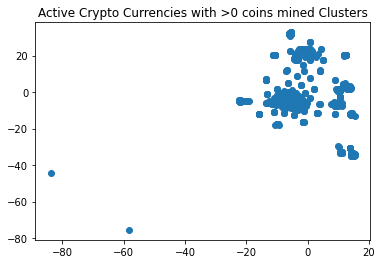

In [25]:
plt.scatter(pca_df['x'], pca_df['y'])
plt.title('Active Crypto Currencies with >0 coins mined Clusters')

Observations:
- There seems to be some distinct clustering. It seems that overall most of the coins that meet our selection have very similar characteristics other than a few outliers. Within the larger cluster seems to be one larger cluster and 2 smaller clusters that may be worth examining.

K-Means Analysis

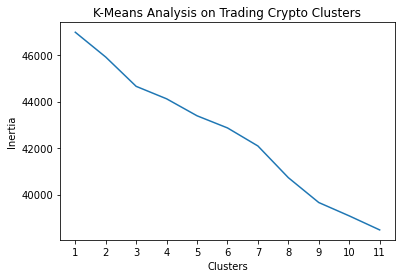

In [28]:
#import Kmeans
from sklearn.cluster import KMeans
# Create inertias
inertia = []
k = list(range(1, 12))
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_pca)
    inertia.append(km.inertia_)

# Plot the Elbow Curve
elbow_plot = {"k": k, "inertia": inertia}
elbow = pd.DataFrame(elbow_plot)

plt.plot(elbow['k'], elbow['inertia'])
plt.xticks(range(1,12))
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('K-Means Analysis on Trading Crypto Clusters')
plt.show()

Observations:
- As i mentioned above it seems to be one large cluster and the K-means analysis seems to recommend observing the data in 1 cluster. The predictability of the model reduces as you add more clusters.